### Este cuaderno limpiará los datos de los datasets logrados de control y con sujetos de patología, y cuando no encuentre datos, realizará un rellenado con un criterio.

In [2]:
!pip install -q scikit-learn seaborn

You should consider upgrading via the 'c:\hcgalvan\repositorios\hcgalvan_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
# importamos las librerias necesarias
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

np.random.seed(42)

In [ ]:
# Solo cuando estás en Google Colab
DATA_PATH = "https://github.com/brainhack-school2023/hcgalvan_project/raw/main/data/"

In [ ]:
if 'google.colab' in sys.modules:
  def load_datasets_t1(datasets_path=DATA_PATH):
    csv_path = os.path.join(datasets_path, "dataset_final_patol.csv")
    return pd.read_csv(csv_path, encoding= 'unicode_escape')


  def load_datasets_t2(datasets_path=DATA_PATH):
      csv_path = os.path.join(datasets_path, "dataset_final_control.csv")
      return pd.read_csv(csv_path, encoding= 'unicode_escape')

  data_train = load_datasets_t1()
  data_test = load_datasets_t2()

In [2]:
DATA_PATH = "../data"
def load_pat_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final_patol.csv")
    return pd.read_csv(csv_path)

def load_cnt_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final_control.csv")
    return pd.read_csv(csv_path)


In [3]:
data_pre_pat = load_pat_data()
data_pre_cnt = load_cnt_data()


In [4]:
frames = [data_pre_pat, data_pre_cnt]
results = pd.concat(frames)
dataset_gral = results.copy()

In [6]:
dataset_gral.shape

(65, 291)

In [7]:
dataset_gral.to_csv('../data/dataset_gral.csv', index=False)

In [8]:
#hacer un split de los datos
train_set, test_set = train_test_split(dataset_gral, test_size=0.2, random_state=42)

In [9]:
#grabar los datos
train_set.to_csv('../data/train_set.csv', index=False)
test_set.to_csv('../data/test_set.csv', index=False)

<Axes: >

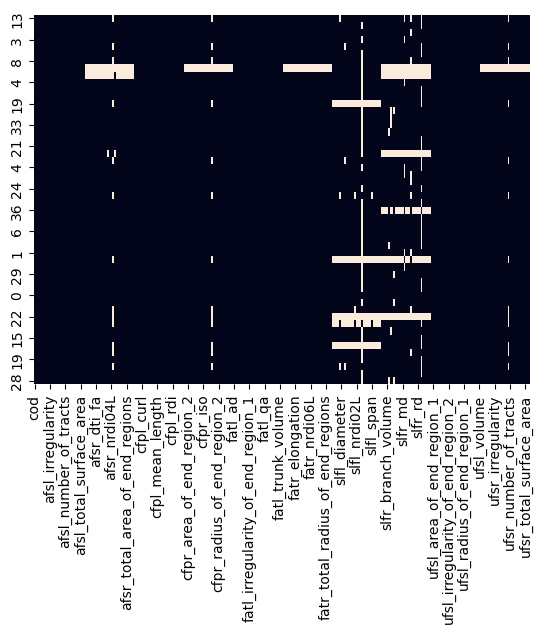

In [13]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(train_set.isnull(), cbar=False)

In [12]:
# problema real es recomendable hacerlo solo con los del conjunto de entrenamiento.
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [15]:
# Ajustamos el modelo e imputamos los missing values
imputer.fit(train_set[["afsr_ad"]])
train_set["afsr_ad"] = imputer.transform(train_set[["afsr_ad"]]).ravel()

imputer.fit(train_set[["afsr_area_of_end_region_1"]])
train_set["afsr_area_of_end_region_1"] = imputer.transform(train_set[["afsr_area_of_end_region_1"]]).ravel()

imputer.fit(train_set[["afsr_area_of_end_region_2"]])
train_set["afsr_area_of_end_region_2"] = imputer.transform(train_set[["afsr_area_of_end_region_2"]]).ravel()

imputer.fit(train_set[["afsr_branch_volume"]])
train_set["afsr_branch_volume"] = imputer.transform(train_set[["afsr_branch_volume"]]).ravel()

imputer.fit(train_set[["afsr_curl"]])
train_set["afsr_curl"] = imputer.transform(train_set[["afsr_curl"]]).ravel()

imputer.fit(train_set[["afsr_diameter"]])
train_set["afsr_diameter"] = imputer.transform(train_set[["afsr_diameter"]]).ravel()

imputer.fit(train_set[["afsr_dti_fa"]])
train_set["afsr_dti_fa"] = imputer.transform(train_set[["afsr_dti_fa"]]).ravel()

imputer.fit(train_set[["afsr_elongation"]])
train_set["afsr_elongation"] = imputer.transform(train_set[["afsr_elongation"]]).ravel()

imputer.fit(train_set[["afsr_irregularity"]])
train_set["afsr_irregularity"] = imputer.transform(train_set[["afsr_irregularity"]]).ravel()

imputer.fit(train_set[["afsr_irregularity_of_end_region_1"]])
train_set["afsr_irregularity_of_end_region_1"] = imputer.transform(train_set[["afsr_irregularity_of_end_region_1"]]).ravel()

imputer.fit(train_set[["afsr_irregularity_of_end_region_2"]])
train_set["afsr_irregularity_of_end_region_2"] = imputer.transform(train_set[["afsr_irregularity_of_end_region_2"]]).ravel()

imputer.fit(train_set[["afsr_iso"]])
train_set["afsr_iso"] = imputer.transform(train_set[["afsr_iso"]]).ravel()

imputer.fit(train_set[["afsr_md"]])
train_set["afsr_md"] = imputer.transform(train_set[["afsr_md"]]).ravel()

imputer.fit(train_set[["afsr_mean_length"]])
train_set["afsr_mean_length"] = imputer.transform(train_set[["afsr_mean_length"]]).ravel()

imputer.fit(train_set[["afsr_nrdi02L"]])
train_set["afsr_nrdi02L"] = imputer.transform(train_set[["afsr_nrdi02L"]]).ravel()

imputer.fit(train_set[["afsr_nrdi04L"]])
train_set["afsr_nrdi04L"] = imputer.transform(train_set[["afsr_nrdi04L"]]).ravel()

imputer.fit(train_set[["afsr_nrdi06L"]])
train_set["afsr_nrdi06L"] = imputer.transform(train_set[["afsr_nrdi06L"]]).ravel()

imputer.fit(train_set[["afsr_number_of_tracts"]])
train_set["afsr_number_of_tracts"] = imputer.transform(train_set[["afsr_number_of_tracts"]]).ravel()

imputer.fit(train_set[["afsr_qa"]])
train_set["afsr_qa"] = imputer.transform(train_set[["afsr_qa"]]).ravel()

imputer.fit(train_set[["afsr_radius_of_end_region_1"]])
train_set["afsr_radius_of_end_region_1"] = imputer.transform(train_set[["afsr_radius_of_end_region_1"]]).ravel()

imputer.fit(train_set[["afsr_radius_of_end_region_2"]])
train_set["afsr_radius_of_end_region_2"] = imputer.transform(train_set[["afsr_radius_of_end_region_2"]]).ravel()

imputer.fit(train_set[["afsr_rd"]])
train_set["afsr_rd"] = imputer.transform(train_set[["afsr_rd"]]).ravel()

imputer.fit(train_set[["afsr_rdi"]])
train_set["afsr_rdi"] = imputer.transform(train_set[["afsr_rdi"]]).ravel()

imputer.fit(train_set[["afsr_span"]])
train_set["afsr_span"] = imputer.transform(train_set[["afsr_span"]]).ravel()

imputer.fit(train_set[["afsr_total_area_of_end_regions"]])
train_set["afsr_total_area_of_end_regions"] = imputer.transform(train_set[["afsr_total_area_of_end_regions"]]).ravel()

imputer.fit(train_set[["afsr_total_radius_of_end_regions"]])
train_set["afsr_total_radius_of_end_regions"] = imputer.transform(train_set[["afsr_total_radius_of_end_regions"]]).ravel()

imputer.fit(train_set[["afsr_total_surface_area"]])
train_set["afsr_total_surface_area"] = imputer.transform(train_set[["afsr_total_surface_area"]]).ravel()

imputer.fit(train_set[["afsr_trunk_volume"]])
train_set["afsr_trunk_volume"] = imputer.transform(train_set[["afsr_trunk_volume"]]).ravel()

imputer.fit(train_set[["afsr_volume"]])
train_set["afsr_volume"] = imputer.transform(train_set[["afsr_volume"]]).ravel()


<Axes: >

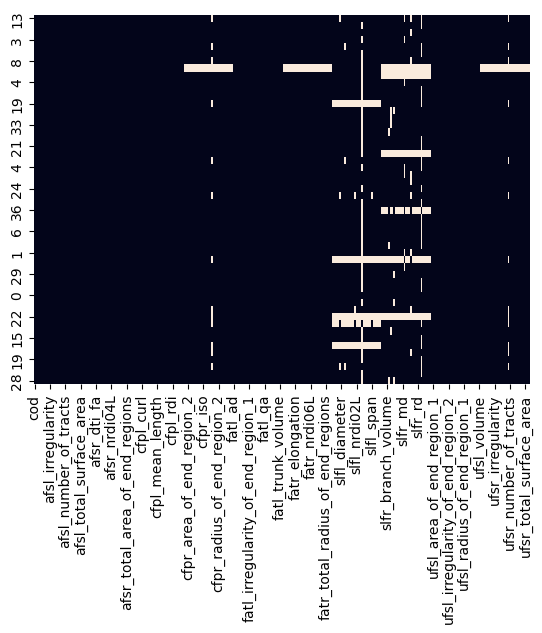

In [16]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(train_set.isnull(), cbar=False)

In [17]:
imputer.fit(train_set[["cfpr_ad"]])
train_set["cfpr_ad"] = imputer.transform(train_set[["cfpr_ad"]]).ravel()

imputer.fit(train_set[["cfpr_area_of_end_region_1"]])
train_set["cfpr_area_of_end_region_1"] = imputer.transform(train_set[["cfpr_area_of_end_region_1"]]).ravel()

imputer.fit(train_set[["cfpr_area_of_end_region_2"]])
train_set["cfpr_area_of_end_region_2"] = imputer.transform(train_set[["cfpr_area_of_end_region_2"]]).ravel()

imputer.fit(train_set[["cfpr_branch_volume"]])
train_set["cfpr_branch_volume"] = imputer.transform(train_set[["cfpr_branch_volume"]]).ravel()

imputer.fit(train_set[["cfpr_curl"]])
train_set["cfpr_curl"] = imputer.transform(train_set[["cfpr_curl"]]).ravel()

imputer.fit(train_set[["cfpr_diameter"]])
train_set["cfpr_diameter"] = imputer.transform(train_set[["cfpr_diameter"]]).ravel()

imputer.fit(train_set[["cfpr_dti_fa"]])
train_set["cfpr_dti_fa"] = imputer.transform(train_set[["cfpr_dti_fa"]]).ravel()

imputer.fit(train_set[["cfpr_elongation"]])
train_set["cfpr_elongation"] = imputer.transform(train_set[["cfpr_elongation"]]).ravel()

imputer.fit(train_set[["cfpr_irregularity"]])
train_set["cfpr_irregularity"] = imputer.transform(train_set[["cfpr_irregularity"]]).ravel()

imputer.fit(train_set[["cfpr_irregularity_of_end_region_1"]])
train_set["cfpr_irregularity_of_end_region_1"] = imputer.transform(train_set[["cfpr_irregularity_of_end_region_1"]]).ravel()

imputer.fit(train_set[["cfpr_irregularity_of_end_region_2"]])
train_set["cfpr_irregularity_of_end_region_2"] = imputer.transform(train_set[["cfpr_irregularity_of_end_region_2"]]).ravel()

imputer.fit(train_set[["cfpr_iso"]])
train_set["cfpr_iso"] = imputer.transform(train_set[["cfpr_iso"]]).ravel()

imputer.fit(train_set[["cfpr_md"]])
train_set["cfpr_md"] = imputer.transform(train_set[["cfpr_md"]]).ravel()

imputer.fit(train_set[["cfpr_mean_length"]])
train_set["cfpr_mean_length"] = imputer.transform(train_set[["cfpr_mean_length"]]).ravel()

imputer.fit(train_set[["cfpr_nrdi02L"]])
train_set["cfpr_nrdi02L"] = imputer.transform(train_set[["cfpr_nrdi02L"]]).ravel()

imputer.fit(train_set[["cfpr_nrdi04L"]])
train_set["cfpr_nrdi04L"] = imputer.transform(train_set[["cfpr_nrdi04L"]]).ravel()

imputer.fit(train_set[["cfpr_nrdi06L"]])
train_set["cfpr_nrdi06L"] = imputer.transform(train_set[["cfpr_nrdi06L"]]).ravel()

imputer.fit(train_set[["cfpr_number_of_tracts"]])
train_set["cfpr_number_of_tracts"] = imputer.transform(train_set[["cfpr_number_of_tracts"]]).ravel()

imputer.fit(train_set[["cfpr_qa"]])
train_set["cfpr_qa"] = imputer.transform(train_set[["cfpr_qa"]]).ravel()

imputer.fit(train_set[["cfpr_radius_of_end_region_1"]])
train_set["cfpr_radius_of_end_region_1"] = imputer.transform(train_set[["cfpr_radius_of_end_region_1"]]).ravel()

imputer.fit(train_set[["cfpr_radius_of_end_region_2"]])
train_set["cfpr_radius_of_end_region_2"] = imputer.transform(train_set[["cfpr_radius_of_end_region_2"]]).ravel()

imputer.fit(train_set[["cfpr_rd"]])
train_set["cfpr_rd"] = imputer.transform(train_set[["cfpr_rd"]]).ravel()

imputer.fit(train_set[["cfpr_rdi"]])
train_set["cfpr_rdi"] = imputer.transform(train_set[["cfpr_rdi"]]).ravel()

imputer.fit(train_set[["cfpr_span"]])
train_set["cfpr_span"] = imputer.transform(train_set[["cfpr_span"]]).ravel()

imputer.fit(train_set[["cfpr_total_area_of_end_regions"]])
train_set["cfpr_total_area_of_end_regions"] = imputer.transform(train_set[["cfpr_total_area_of_end_regions"]]).ravel()

imputer.fit(train_set[["cfpr_total_radius_of_end_regions"]])
train_set["cfpr_total_radius_of_end_regions"] = imputer.transform(train_set[["cfpr_total_radius_of_end_regions"]]).ravel()

imputer.fit(train_set[["cfpr_total_surface_area"]])
train_set["cfpr_total_surface_area"] = imputer.transform(train_set[["cfpr_total_surface_area"]]).ravel()

imputer.fit(train_set[["cfpr_trunk_volume"]])
train_set["cfpr_trunk_volume"] = imputer.transform(train_set[["cfpr_trunk_volume"]]).ravel()

imputer.fit(train_set[["cfpr_volume"]])
train_set["cfpr_volume"] = imputer.transform(train_set[["cfpr_volume"]]).ravel()

In [ ]:

import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(train_set.isnull(), cbar=False)

In [19]:
imputer.fit(train_set[["fatr_ad"]])
train_set["fatr_ad"] = imputer.transform(train_set[["fatr_ad"]]).ravel()

imputer.fit(train_set[["fatr_area_of_end_region_1"]])
train_set["fatr_area_of_end_region_1"] = imputer.transform(train_set[["fatr_area_of_end_region_1"]]).ravel()

imputer.fit(train_set[["fatr_area_of_end_region_2"]])
train_set["fatr_area_of_end_region_2"] = imputer.transform(train_set[["fatr_area_of_end_region_2"]]).ravel()

imputer.fit(train_set[["fatr_branch_volume"]])
train_set["fatr_branch_volume"] = imputer.transform(train_set[["fatr_branch_volume"]]).ravel()

imputer.fit(train_set[["fatr_curl"]])
train_set["fatr_curl"] = imputer.transform(train_set[["fatr_curl"]]).ravel()

imputer.fit(train_set[["fatr_diameter"]])
train_set["fatr_diameter"] = imputer.transform(train_set[["fatr_diameter"]]).ravel()

imputer.fit(train_set[["fatr_dti_fa"]])
train_set["fatr_dti_fa"] = imputer.transform(train_set[["fatr_dti_fa"]]).ravel()

imputer.fit(train_set[["fatr_elongation"]])
train_set["fatr_elongation"] = imputer.transform(train_set[["fatr_elongation"]]).ravel()

imputer.fit(train_set[["fatr_irregularity"]])
train_set["fatr_irregularity"] = imputer.transform(train_set[["fatr_irregularity"]]).ravel()

imputer.fit(train_set[["fatr_irregularity_of_end_region_1"]])
train_set["fatr_irregularity_of_end_region_1"] = imputer.transform(train_set[["fatr_irregularity_of_end_region_1"]]).ravel()

imputer.fit(train_set[["fatr_irregularity_of_end_region_2"]])
train_set["fatr_irregularity_of_end_region_2"] = imputer.transform(train_set[["fatr_irregularity_of_end_region_2"]]).ravel()

imputer.fit(train_set[["fatr_iso"]])
train_set["fatr_iso"] = imputer.transform(train_set[["fatr_iso"]]).ravel()

imputer.fit(train_set[["fatr_md"]])
train_set["fatr_md"] = imputer.transform(train_set[["fatr_md"]]).ravel()

imputer.fit(train_set[["fatr_mean_length"]])
train_set["fatr_mean_length"] = imputer.transform(train_set[["fatr_mean_length"]]).ravel()

imputer.fit(train_set[["fatr_nrdi02L"]])
train_set["fatr_nrdi02L"] = imputer.transform(train_set[["fatr_nrdi02L"]]).ravel()

imputer.fit(train_set[["fatr_nrdi04L"]])
train_set["fatr_nrdi04L"] = imputer.transform(train_set[["fatr_nrdi04L"]]).ravel()

imputer.fit(train_set[["fatr_nrdi06L"]])
train_set["fatr_nrdi06L"] = imputer.transform(train_set[["fatr_nrdi06L"]]).ravel()

imputer.fit(train_set[["fatr_number_of_tracts"]])
train_set["fatr_number_of_tracts"] = imputer.transform(train_set[["fatr_number_of_tracts"]]).ravel()

imputer.fit(train_set[["fatr_qa"]])
train_set["fatr_qa"] = imputer.transform(train_set[["fatr_qa"]]).ravel()

imputer.fit(train_set[["fatr_radius_of_end_region_1"]])
train_set["fatr_radius_of_end_region_1"] = imputer.transform(train_set[["fatr_radius_of_end_region_1"]]).ravel()
								
imputer.fit(train_set[["fatr_radius_of_end_region_2"]])
train_set["fatr_radius_of_end_region_2"] = imputer.transform(train_set[["fatr_radius_of_end_region_2"]]).ravel()

imputer.fit(train_set[["fatr_rd"]])
train_set["fatr_rd"] = imputer.transform(train_set[["fatr_rd"]]).ravel()

imputer.fit(train_set[["fatr_rdi"]])
train_set["fatr_rdi"] = imputer.transform(train_set[["fatr_rdi"]]).ravel()

imputer.fit(train_set[["fatr_span"]])
train_set["fatr_span"] = imputer.transform(train_set[["fatr_span"]]).ravel()

imputer.fit(train_set[["fatr_total_area_of_end_regions"]])
train_set["fatr_total_area_of_end_regions"] = imputer.transform(train_set[["fatr_total_area_of_end_regions"]]).ravel()

imputer.fit(train_set[["fatr_total_radius_of_end_regions"]])
train_set["fatr_total_radius_of_end_regions"] = imputer.transform(train_set[["fatr_total_radius_of_end_regions"]]).ravel()

imputer.fit(train_set[["fatr_total_surface_area"]])
train_set["fatr_total_surface_area"] = imputer.transform(train_set[["fatr_total_surface_area"]]).ravel()

imputer.fit(train_set[["fatr_trunk_volume"]])
train_set["fatr_trunk_volume"] = imputer.transform(train_set[["fatr_trunk_volume"]]).ravel()

imputer.fit(train_set[["fatr_volume"]])
train_set["fatr_volume"] = imputer.transform(train_set[["fatr_volume"]]).ravel()

<Axes: >

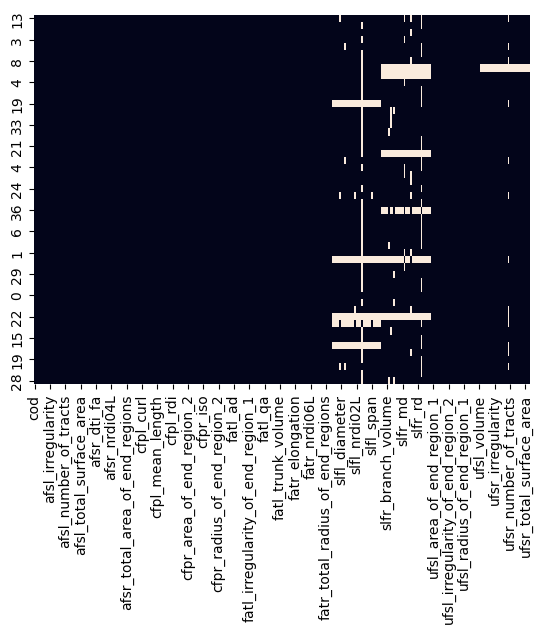

In [20]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(train_set.isnull(), cbar=False)

In [21]:
imputer.fit(train_set[["slfl_ad"]])
train_set["slfl_ad"] = imputer.transform(train_set[["slfl_ad"]]).ravel()

imputer.fit(train_set[["slfl_area_of_end_region_1"]])
train_set["slfl_area_of_end_region_1"] = imputer.transform(train_set[["slfl_area_of_end_region_1"]]).ravel()

imputer.fit(train_set[["slfl_area_of_end_region_2"]])
train_set["slfl_area_of_end_region_2"] = imputer.transform(train_set[["slfl_area_of_end_region_2"]]).ravel()

imputer.fit(train_set[["slfl_branch_volume"]])
train_set["slfl_branch_volume"] = imputer.transform(train_set[["slfl_branch_volume"]]).ravel()

imputer.fit(train_set[["slfl_curl"]])
train_set["slfl_curl"] = imputer.transform(train_set[["slfl_curl"]]).ravel()

imputer.fit(train_set[["slfl_diameter"]])
train_set["slfl_diameter"] = imputer.transform(train_set[["slfl_diameter"]]).ravel()

imputer.fit(train_set[["slfl_dti_fa"]])
train_set["slfl_dti_fa"] = imputer.transform(train_set[["slfl_dti_fa"]]).ravel()

imputer.fit(train_set[["slfl_elongation"]])
train_set["slfl_elongation"] = imputer.transform(train_set[["slfl_elongation"]]).ravel()

imputer.fit(train_set[["slfl_irregularity"]])
train_set["slfl_irregularity"] = imputer.transform(train_set[["slfl_irregularity"]]).ravel()

imputer.fit(train_set[["slfl_irregularity_of_end_region_1"]])
train_set["slfl_irregularity_of_end_region_1"] = imputer.transform(train_set[["slfl_irregularity_of_end_region_1"]]).ravel()

imputer.fit(train_set[["slfl_irregularity_of_end_region_2"]])
train_set["slfl_irregularity_of_end_region_2"] = imputer.transform(train_set[["slfl_irregularity_of_end_region_2"]]).ravel()

imputer.fit(train_set[["slfl_iso"]])
train_set["slfl_iso"] = imputer.transform(train_set[["slfl_iso"]]).ravel()

imputer.fit(train_set[["slfl_md"]])
train_set["slfl_md"] = imputer.transform(train_set[["slfl_md"]]).ravel()

imputer.fit(train_set[["slfl_mean_length"]])
train_set["slfl_mean_length"] = imputer.transform(train_set[["slfl_mean_length"]]).ravel()

imputer.fit(train_set[["slfl_nrdi02L"]])
train_set["slfl_nrdi02L"] = imputer.transform(train_set[["slfl_nrdi02L"]]).ravel()

imputer.fit(train_set[["slfl_nrdi04L"]])
train_set["slfl_nrdi04L"] = imputer.transform(train_set[["slfl_nrdi04L"]]).ravel()

imputer.fit(train_set[["slfl_nrdi06L"]])
train_set["slfl_nrdi06L"] = imputer.transform(train_set[["slfl_nrdi06L"]]).ravel()

imputer.fit(train_set[["slfl_number_of_tracts"]])
train_set["slfl_number_of_tracts"] = imputer.transform(train_set[["slfl_number_of_tracts"]]).ravel()

imputer.fit(train_set[["slfl_qa"]])
train_set["slfl_qa"] = imputer.transform(train_set[["slfl_qa"]]).ravel()

imputer.fit(train_set[["slfl_radius_of_end_region_1"]])
train_set["slfl_radius_of_end_region_1"] = imputer.transform(train_set[["slfl_radius_of_end_region_1"]]).ravel()
								
imputer.fit(train_set[["slfl_radius_of_end_region_2"]])
train_set["slfl_radius_of_end_region_2"] = imputer.transform(train_set[["slfl_radius_of_end_region_2"]]).ravel()

imputer.fit(train_set[["slfl_rd"]])
train_set["slfl_rd"] = imputer.transform(train_set[["slfl_rd"]]).ravel()

imputer.fit(train_set[["slfl_rdi"]])
train_set["slfl_rdi"] = imputer.transform(train_set[["slfl_rdi"]]).ravel()

imputer.fit(train_set[["slfl_span"]])
train_set["slfl_span"] = imputer.transform(train_set[["slfl_span"]]).ravel()

imputer.fit(train_set[["slfl_total_area_of_end_regions"]])
train_set["slfl_total_area_of_end_regions"] = imputer.transform(train_set[["slfl_total_area_of_end_regions"]]).ravel()

imputer.fit(train_set[["slfl_total_radius_of_end_regions"]])
train_set["slfl_total_radius_of_end_regions"] = imputer.transform(train_set[["slfl_total_radius_of_end_regions"]]).ravel()

imputer.fit(train_set[["slfl_total_surface_area"]])
train_set["slfl_total_surface_area"] = imputer.transform(train_set[["slfl_total_surface_area"]]).ravel()

imputer.fit(train_set[["slfl_trunk_volume"]])
train_set["slfl_trunk_volume"] = imputer.transform(train_set[["slfl_trunk_volume"]]).ravel()

imputer.fit(train_set[["slfl_volume"]])
train_set["slfl_volume"] = imputer.transform(train_set[["slfl_volume"]]).ravel()

imputer.fit(train_set[["slfr_ad"]])
train_set["slfr_ad"] = imputer.transform(train_set[["slfr_ad"]]).ravel()

imputer.fit(train_set[["slfr_area_of_end_region_1"]])
train_set["slfr_area_of_end_region_1"] = imputer.transform(train_set[["slfr_area_of_end_region_1"]]).ravel()

imputer.fit(train_set[["slfr_area_of_end_region_2"]])
train_set["slfr_area_of_end_region_2"] = imputer.transform(train_set[["slfr_area_of_end_region_2"]]).ravel()

imputer.fit(train_set[["slfr_branch_volume"]])
train_set["slfr_branch_volume"] = imputer.transform(train_set[["slfr_branch_volume"]]).ravel()

imputer.fit(train_set[["slfr_curl"]])
train_set["slfr_curl"] = imputer.transform(train_set[["slfr_curl"]]).ravel()

imputer.fit(train_set[["slfr_diameter"]])
train_set["slfr_diameter"] = imputer.transform(train_set[["slfr_diameter"]]).ravel()

imputer.fit(train_set[["slfr_dti_fa"]])
train_set["slfr_dti_fa"] = imputer.transform(train_set[["slfr_dti_fa"]]).ravel()

imputer.fit(train_set[["slfr_elongation"]])
train_set["slfr_elongation"] = imputer.transform(train_set[["slfr_elongation"]]).ravel()

imputer.fit(train_set[["slfr_irregularity"]])
train_set["slfr_irregularity"] = imputer.transform(train_set[["slfr_irregularity"]]).ravel()

imputer.fit(train_set[["slfr_irregularity_of_end_region_1"]])
train_set["slfr_irregularity_of_end_region_1"] = imputer.transform(train_set[["slfr_irregularity_of_end_region_1"]]).ravel()

imputer.fit(train_set[["slfr_irregularity_of_end_region_2"]])
train_set["slfr_irregularity_of_end_region_2"] = imputer.transform(train_set[["slfr_irregularity_of_end_region_2"]]).ravel()

imputer.fit(train_set[["slfr_iso"]])
train_set["slfr_iso"] = imputer.transform(train_set[["slfr_iso"]]).ravel()

imputer.fit(train_set[["slfr_md"]])
train_set["slfr_md"] = imputer.transform(train_set[["slfr_md"]]).ravel()

imputer.fit(train_set[["slfr_mean_length"]])
train_set["slfr_mean_length"] = imputer.transform(train_set[["slfr_mean_length"]]).ravel()

imputer.fit(train_set[["slfr_nrdi02L"]])
train_set["slfr_nrdi02L"] = imputer.transform(train_set[["slfr_nrdi02L"]]).ravel()

imputer.fit(train_set[["slfr_nrdi04L"]])
train_set["slfr_nrdi04L"] = imputer.transform(train_set[["slfr_nrdi04L"]]).ravel()

imputer.fit(train_set[["slfr_nrdi06L"]])
train_set["slfr_nrdi06L"] = imputer.transform(train_set[["slfr_nrdi06L"]]).ravel()

imputer.fit(train_set[["slfr_number_of_tracts"]])
train_set["slfr_number_of_tracts"] = imputer.transform(train_set[["slfr_number_of_tracts"]]).ravel()

imputer.fit(train_set[["slfr_qa"]])
train_set["slfr_qa"] = imputer.transform(train_set[["slfr_qa"]]).ravel()

imputer.fit(train_set[["slfr_radius_of_end_region_1"]])
train_set["slfr_radius_of_end_region_1"] = imputer.transform(train_set[["slfr_radius_of_end_region_1"]]).ravel()
								
imputer.fit(train_set[["slfr_radius_of_end_region_2"]])
train_set["slfr_radius_of_end_region_2"] = imputer.transform(train_set[["slfr_radius_of_end_region_2"]]).ravel()

imputer.fit(train_set[["slfr_rd"]])
train_set["slfr_rd"] = imputer.transform(train_set[["slfr_rd"]]).ravel()

imputer.fit(train_set[["slfr_rdi"]])
train_set["slfr_rdi"] = imputer.transform(train_set[["slfr_rdi"]]).ravel()

imputer.fit(train_set[["slfr_span"]])
train_set["slfr_span"] = imputer.transform(train_set[["slfr_span"]]).ravel()

imputer.fit(train_set[["slfr_total_area_of_end_regions"]])
train_set["slfr_total_area_of_end_regions"] = imputer.transform(train_set[["slfr_total_area_of_end_regions"]]).ravel()

imputer.fit(train_set[["slfr_total_radius_of_end_regions"]])
train_set["slfr_total_radius_of_end_regions"] = imputer.transform(train_set[["slfr_total_radius_of_end_regions"]]).ravel()

imputer.fit(train_set[["slfr_total_surface_area"]])
train_set["slfr_total_surface_area"] = imputer.transform(train_set[["slfr_total_surface_area"]]).ravel()

imputer.fit(train_set[["slfr_trunk_volume"]])
train_set["slfr_trunk_volume"] = imputer.transform(train_set[["slfr_trunk_volume"]]).ravel()

imputer.fit(train_set[["slfr_volume"]])
train_set["slfr_volume"] = imputer.transform(train_set[["slfr_volume"]]).ravel()


<Axes: >

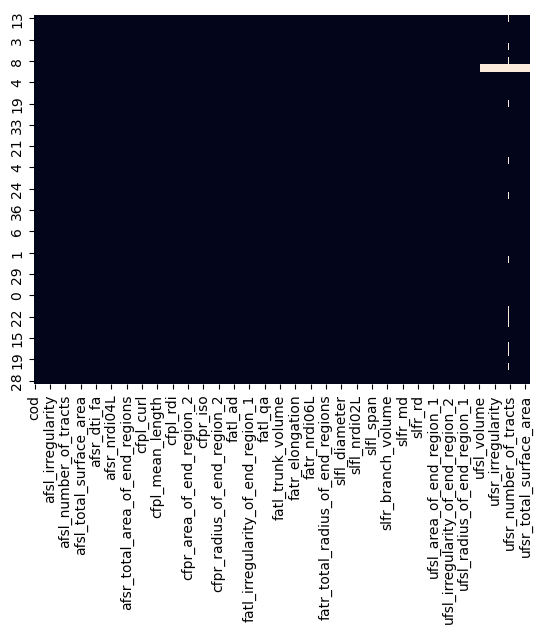

In [22]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(train_set.isnull(), cbar=False)

In [23]:
imputer.fit(train_set[["ufsr_ad"]])
train_set["ufsr_ad"] = imputer.transform(train_set[["ufsr_ad"]]).ravel()

imputer.fit(train_set[["ufsr_area_of_end_region_1"]])
train_set["ufsr_area_of_end_region_1"] = imputer.transform(train_set[["ufsr_area_of_end_region_1"]]).ravel()

imputer.fit(train_set[["ufsr_area_of_end_region_2"]])
train_set["ufsr_area_of_end_region_2"] = imputer.transform(train_set[["ufsr_area_of_end_region_2"]]).ravel()

imputer.fit(train_set[["ufsr_branch_volume"]])
train_set["ufsr_branch_volume"] = imputer.transform(train_set[["ufsr_branch_volume"]]).ravel()

imputer.fit(train_set[["ufsr_curl"]])
train_set["ufsr_curl"] = imputer.transform(train_set[["ufsr_curl"]]).ravel()

imputer.fit(train_set[["ufsr_diameter"]])
train_set["ufsr_diameter"] = imputer.transform(train_set[["ufsr_diameter"]]).ravel()

imputer.fit(train_set[["ufsr_dti_fa"]])
train_set["ufsr_dti_fa"] = imputer.transform(train_set[["ufsr_dti_fa"]]).ravel()

imputer.fit(train_set[["ufsr_elongation"]])
train_set["ufsr_elongation"] = imputer.transform(train_set[["ufsr_elongation"]]).ravel()

imputer.fit(train_set[["ufsr_irregularity"]])
train_set["ufsr_irregularity"] = imputer.transform(train_set[["ufsr_irregularity"]]).ravel()

imputer.fit(train_set[["ufsr_irregularity_of_end_region_1"]])
train_set["ufsr_irregularity_of_end_region_1"] = imputer.transform(train_set[["ufsr_irregularity_of_end_region_1"]]).ravel()

imputer.fit(train_set[["ufsr_irregularity_of_end_region_2"]])
train_set["ufsr_irregularity_of_end_region_2"] = imputer.transform(train_set[["ufsr_irregularity_of_end_region_2"]]).ravel()

imputer.fit(train_set[["ufsr_iso"]])
train_set["ufsr_iso"] = imputer.transform(train_set[["ufsr_iso"]]).ravel()

imputer.fit(train_set[["ufsr_md"]])
train_set["ufsr_md"] = imputer.transform(train_set[["ufsr_md"]]).ravel()

imputer.fit(train_set[["ufsr_mean_length"]])
train_set["ufsr_mean_length"] = imputer.transform(train_set[["ufsr_mean_length"]]).ravel()

imputer.fit(train_set[["ufsr_nrdi02L"]])
train_set["ufsr_nrdi02L"] = imputer.transform(train_set[["ufsr_nrdi02L"]]).ravel()

imputer.fit(train_set[["ufsr_nrdi04L"]])
train_set["ufsr_nrdi04L"] = imputer.transform(train_set[["ufsr_nrdi04L"]]).ravel()

imputer.fit(train_set[["ufsr_nrdi06L"]])
train_set["ufsr_nrdi06L"] = imputer.transform(train_set[["ufsr_nrdi06L"]]).ravel()

imputer.fit(train_set[["ufsr_number_of_tracts"]])
train_set["ufsr_number_of_tracts"] = imputer.transform(train_set[["ufsr_number_of_tracts"]]).ravel()

imputer.fit(train_set[["ufsr_qa"]])
train_set["ufsr_qa"] = imputer.transform(train_set[["ufsr_qa"]]).ravel()

imputer.fit(train_set[["ufsr_radius_of_end_region_1"]])
train_set["ufsr_radius_of_end_region_1"] = imputer.transform(train_set[["ufsr_radius_of_end_region_1"]]).ravel()
								
imputer.fit(train_set[["ufsr_radius_of_end_region_2"]])
train_set["ufsr_radius_of_end_region_2"] = imputer.transform(train_set[["ufsr_radius_of_end_region_2"]]).ravel()

imputer.fit(train_set[["ufsr_rd"]])
train_set["ufsr_rd"] = imputer.transform(train_set[["ufsr_rd"]]).ravel()
						
imputer.fit(train_set[["ufsr_rdi"]])
train_set["ufsr_rdi"] = imputer.transform(train_set[["ufsr_rdi"]]).ravel()

imputer.fit(train_set[["ufsr_span"]])
train_set["ufsr_span"] = imputer.transform(train_set[["ufsr_span"]]).ravel()

imputer.fit(train_set[["ufsr_total_area_of_end_regions"]])
train_set["ufsr_total_area_of_end_regions"] = imputer.transform(train_set[["ufsr_total_area_of_end_regions"]]).ravel()

imputer.fit(train_set[["ufsr_total_radius_of_end_regions"]])
train_set["ufsr_total_radius_of_end_regions"] = imputer.transform(train_set[["ufsr_total_radius_of_end_regions"]]).ravel()

imputer.fit(train_set[["ufsr_total_surface_area"]])
train_set["ufsr_total_surface_area"] = imputer.transform(train_set[["ufsr_total_surface_area"]]).ravel()

imputer.fit(train_set[["ufsr_trunk_volume"]])
train_set["ufsr_trunk_volume"] = imputer.transform(train_set[["ufsr_trunk_volume"]]).ravel()

imputer.fit(train_set[["ufsr_volume"]])
train_set["ufsr_volume"] = imputer.transform(train_set[["ufsr_volume"]]).ravel()

<Axes: >

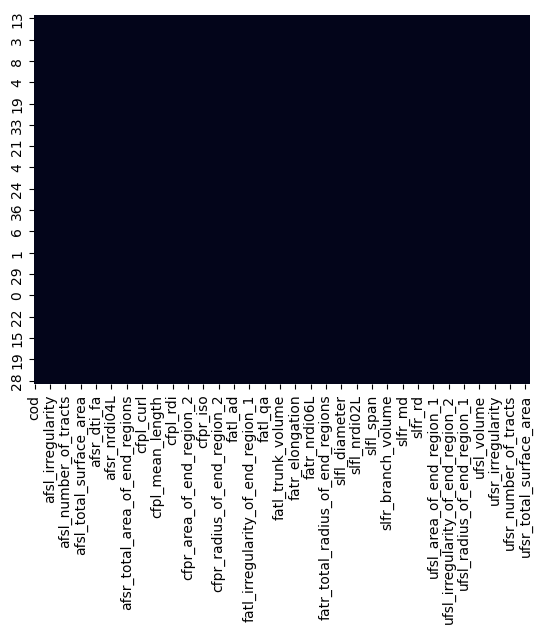

In [24]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(train_set.isnull(), cbar=False)

In [31]:
train_set.to_csv("../data/train_set_limpio.csv", index=False)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=445543)
for train_index, test_index in split.split(data_pre, data_pre["income_cat"]):
    train_df = data_pre.loc[train_index]
    test_df = data_pre.loc[test_index]

In [50]:
train_set.shape

(52, 292)

In [48]:

train_set.loc[train_set.cod.str.contains('sub-500'),'label'] = '1'

C:\Users\User\AppData\Local\Temp\ipykernel_8280\432872689.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_set.loc[train_set.cod.str.contains('sub-500'),'label'] = '1'


In [51]:
train_set.loc[train_set.cod.str.contains('sub-10'),'label'] = '0'

In [55]:
train_set.columns

Index(['cod', 'afsl_ad', 'afsl_area_of_end_region_1',
       'afsl_area_of_end_region_2', 'afsl_branch_volume', 'afsl_curl',
       'afsl_diameter', 'afsl_dti_fa', 'afsl_elongation', 'afsl_irregularity',
       ...
       'ufsr_radius_of_end_region_2', 'ufsr_rd', 'ufsr_rdi', 'ufsr_span',
       'ufsr_total_area_of_end_regions', 'ufsr_total_radius_of_end_regions',
       'ufsr_total_surface_area', 'ufsr_trunk_volume', 'ufsr_volume', 'label'],
      dtype='object', length=292)

In [ ]:
train_set.to_csv("../data/train_set_limpio.csv", index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# correlacion entre variables
corr = train_set.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f")